<a href="https://colab.research.google.com/github/iambranzzz/mahhhney/blob/main/Financial_News_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

from transformers import pipeline

pipe = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/933 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [3]:
from datasets import load_dataset

ds = load_dataset("zeroshot/twitter-financial-news-sentiment")

README.md:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

sent_train.csv:   0%|          | 0.00/859k [00:00<?, ?B/s]

sent_valid.csv:   0%|          | 0.00/217k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9543 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2388 [00:00<?, ? examples/s]

In [4]:
sequence_to_classify = 'Sulfurcell Solartechnik GmbH , a Berlin-based manufacturer of thin-film solar panels, is seeking a strategic partner to help it expand production capacity by more than seven-fold. The company has raised 150 million euros ($205 million), including about 30 million euros in government incentives, Kalman Kaufman, chairman of the supervisory board, said in a Tel Aviv interview at a Landmark Ventures business conference yesterday.'
candidate_labels = ['positive', 'neutral', 'negative']

pipe(sequence_to_classify)

[{'label': 'positive', 'score': 0.999038815498352}]

In [22]:
import pandas as pd
df = pd.DataFrame(ds['train'])
#use first 500 data with label 1 and 0 only
df = df.head(500)
df = df.reset_index(drop=True)

df.head()

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0


In [6]:
#change the label value from 0 to negative and 1 to positive and 2 to neutral
df['label'] = df['label'].replace({0: 'negative', 1: 'positive', 2:'neutral'})
df.head()

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,negative
1,$CCL $RCL - Nomura points to bookings weakness...,negative
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",negative
3,$ESS: BTIG Research cuts to Neutral https://t....,negative
4,$FNKO - Funko slides after Piper Jaffray PT cu...,negative


In [7]:
df['label'].value_counts()

,count
label,
positive,243
negative,153
neutral,104


In [8]:
# Remove stop words: Eliminate common words (like "is", "the", "and") that don't contribute much meaning.

def eliminatecommonwords(text):
    from nltk.corpus import stopwords
    import nltk
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
#run the function for all email in dataset2
df['text'] = df['text'].apply(eliminatecommonwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_

In [9]:
# Remove special characters and numbers: Clean up punctuation, emojis, and digits if they don't affect sentiment.

def removespecialcharacters(text):
    import re
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return cleaned_text
#run remove special characters for every email in dataset 2
df['text'] = df['text'].apply(removespecialcharacters)

In [10]:
# Stemming or Lemmatization: Reduce words to their root form (e.g., "running" → "run").

def stemming(text):
    from nltk.stem import PorterStemmer
    stemmer = PorterStemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)
#run stemming for every email in dataset2
df['text'] = df['text'].apply(stemming)

In [11]:
#Perform sentiment analysis on first 500 text in df
result = []
for i in range(500):
    result.append(pipe(df['text'][i]))
result

[[{'label': 'neutral', 'score': 0.9998835325241089}],
 [{'label': 'negative', 'score': 0.9807865023612976}],
 [{'label': 'negative', 'score': 0.9986922144889832}],
 [{'label': 'negative', 'score': 0.9189220666885376}],
 [{'label': 'neutral', 'score': 0.9998658895492554}],
 [{'label': 'neutral', 'score': 0.9998080134391785}],
 [{'label': 'negative', 'score': 0.9878303408622742}],
 [{'label': 'negative', 'score': 0.9873130917549133}],
 [{'label': 'negative', 'score': 0.9983389377593994}],
 [{'label': 'negative', 'score': 0.9624753594398499}],
 [{'label': 'neutral', 'score': 0.9998537302017212}],
 [{'label': 'neutral', 'score': 0.5908586978912354}],
 [{'label': 'neutral', 'score': 0.539788544178009}],
 [{'label': 'neutral', 'score': 0.9996092915534973}],
 [{'label': 'neutral', 'score': 0.9998055100440979}],
 [{'label': 'negative', 'score': 0.7242751121520996}],
 [{'label': 'negative', 'score': 0.975492000579834}],
 [{'label': 'neutral', 'score': 0.9997181296348572}],
 [{'label': 'negative

In [12]:
#Create a new dataframe with the predicted data
data = []
for i in range(500):
  data.append({
    'label': result[i][0]['label'],
    'score': result[i][0]['score']
})

predicteddata = pd.DataFrame(data)
predicteddata

,label,score
0,neutral,0.999884
1,negative,0.980787
2,negative,0.998692
3,negative,0.918922
4,neutral,0.999866
...,...,...
495,neutral,0.999876
496,neutral,0.999881
497,neutral,0.999873
498,neutral,0.999867


In [13]:
#compare predicteddata with the actual data
comparedata = pd.DataFrame({'Predicted': predicteddata['label'], 'Actual': df['label'][:500], 'score': predicteddata['score']})
comparedata

,Predicted,Actual,score
0,neutral,negative,0.999884
1,negative,negative,0.980787
2,negative,negative,0.998692
3,negative,negative,0.918922
4,neutral,negative,0.999866
...,...,...,...
495,neutral,neutral,0.999876
496,neutral,neutral,0.999881
497,neutral,neutral,0.999873
498,neutral,neutral,0.999867


In [14]:
# Replace labels with binary values using lambda functions
true_labels = df['label'].apply(lambda x: 0 if x == 'negative' else 1 if x == 'positive' else 2)
predicted_labels = predicteddata['label'].apply(lambda x: 0 if x == 'negative' else 1 if x == 'positive' else 2)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.506
Confusion Matrix:
[[ 88  15  50]
 [ 10  78 155]
 [  6  11  87]]


Text(70.72222222222221, 0.5, 'Actual')

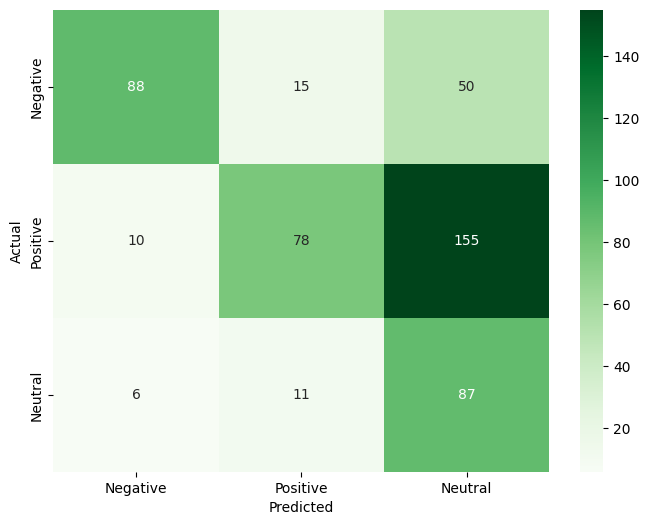

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Positive','Neutral'], yticklabels=['Negative', 'Positive','Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

In summary:



*   True Negatives (TN) = 88 Negative samples were correctly identified
*   False Positives (FP) = 65 Negative samples were incorrectly identified
*   False Negatives (FN) = 165 Positive samples were incorrectly identified as negative
*   True Positives (TP) = 78 Positive samples were correctly identified


Performance Implications:


*   Accuracy:The accuracy is not good at around 0,506

* The model did a decent job at predicting all neutral, positive and negative sentiment. However, the only thing that is holding it back is the neutral sentiment. It looks like the bot is not that good at distinguishing which one is positive sentiment and which one is neutral.

In [17]:
#Training
#Load dataset
from datasets import load_dataset
ds = load_dataset("zeroshot/twitter-financial-news-sentiment")

#Tokenizer
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

tokenized_datasets = ds.map(tokenize_function, batched=True)

small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["train"].shuffle(seed=21).select(range(1000))

Map:   0%|          | 0/9543 [00:00<?, ? examples/s]

Map:   0%|          | 0/2388 [00:00<?, ? examples/s]

In [18]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.9 MB/s eta 0:00:00


In [19]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")
def compute_metrics(eval_pred):
#This function computes the accuracy metric based on the model's predictions and true labels.

#Parameters:
#eval_pred: A tuple containing:
    #- logits: The raw output scores (logits) from the model for each class.
    #- labels: The true labels corresponding to the input data.

#Returns:
#A dictionary containing the computed accuracy score.
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [20]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="test_trainer",           # Directory to save outputs
    evaluation_strategy="epoch",        # Evaluate at the end of each epoch
    save_strategy="epoch",              # Save the model at the end of each epoch
    logging_dir="logs",                 # Directory to save training logs
    logging_steps=10,                   # Log every 10 steps
    per_device_train_batch_size=16,     # Batch size per device (lower value saves memory)
    per_device_eval_batch_size=32,      # Batch size for evaluation
    num_train_epochs=3,                 # Number of epochs (fewer epochs for faster training)
    warmup_steps=100,                   # Warmup steps for learning rate scheduler
    weight_decay=0.01,                  # Weight decay for regularization
    save_total_limit=1,                 # Keep only the most recent checkpoint
    learning_rate=5e-5,                 # Learning rate for fine-tuning
    fp16=True,                          # Enable mixed precision training for faster computation
    seed=42                             # Set a seed for reproducibility
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy
1,0.792600,0.709985,0.700000
2,0.617000,0.472468,0.819000
3,0.371100,0.452081,0.856000


TrainOutput(global_step=189, training_loss=1.2347652394935567, metrics={'train_runtime': 138.0515, 'train_samples_per_second': 21.731, 'train_steps_per_second': 1.369, 'total_flos': 397409283072000.0, 'train_loss': 1.2347652394935567, 'epoch': 3.0})

#Training Conclusion
* The training and validation loss decreased across epochs indicating an effective learning process.
* Accuracy improved throughout the epochs


In [31]:
import torch
# Using the trained model to analyze first 500 data of df
trained_model = trainer.model
tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

# Get the device the model is on
device = next(trained_model.parameters()).device

# Tokenize all inputs
# Convert the Pandas Series to a list of strings
tokenize_function = lambda x: tokenizer(x, padding='max_length', truncation=True, return_tensors='pt') # Convert to PyTorch tensors
tokenized_inputs = tokenize_function(df['text'][:500].tolist()) # Convert to list

# Move tokenized inputs to the same device as the model
tokenized_inputs = {k: v.to(device) for k, v in tokenized_inputs.items()}

# Perform inference
predictions = trained_model(**tokenized_inputs)
# Get logits
logits = predictions.logits
# Convert logits to predicted labels
predicted_labels = np.argmax(logits, axis=1)

print(f"Predicted classes: {predicted_labels}")

OutOfMemoryError: CUDA out of memory. Tried to allocate 750.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 131.06 MiB is free. Process 7942 has 14.62 GiB memory in use. Of the allocated memory 14.44 GiB is allocated by PyTorch, and 42.64 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)